<a href="https://colab.research.google.com/github/UnplugCharger/Week-9-IP/blob/master/Spam_Email_Detection_with_Naive_Bayes_Classifier_Independent_project_week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading our dataset and taking the initial look

In [6]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
spam =pd.read_csv('/content/drive/My Drive/Core Datasets/Week 9/spambase_csv.csv')

In [3]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [21]:
spam.shape

(4601, 58)

We have a very wide dataset .. we will do a classification  with all the columns and then do  data reduction and see how our model performs in those two scenarios.

# EDA

This is an already tokenised tesxt dataset 


we will assume that the team that prepared it did all the EDA and clening before converting it into this format so we will do very little  here 

In [4]:
def sniff(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['sample'] = df.iloc[0]
        info['data type'] = df.dtypes
        info['percent duplicated'] = df.duplicated().sum()*100/len(df)
        info['percent missing'] = df.isnull().sum()*100/len(df)
        return info.sort_values('data type')

In [5]:
sniff(spam)

,sample,data type,percent duplicated,percent missing
class,1.000,int64,8.498153,0.0
capital_run_length_total,278.000,int64,8.498153,0.0
capital_run_length_longest,61.000,int64,8.498153,0.0
capital_run_length_average,3.756,float64,8.498153,0.0
word_freq_telnet,0.000,float64,8.498153,0.0
word_freq_857,0.000,float64,8.498153,0.0
word_freq_data,0.000,float64,8.498153,0.0
word_freq_415,0.000,float64,8.498153,0.0
word_freq_85,0.000,float64,8.498153,0.0
word_freq_technology,0.000,float64,8.498153,0.0


All our dataset columns are already in a datatype form that can be taken by  a machine learning model 



we have duplicated values here ie 8.49% of our data is duplicated .... but since we are doing a classification ... duplicates dont affect classification models that much so we will let them be

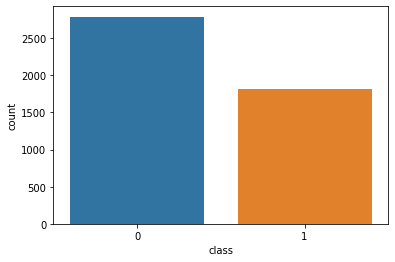

In [8]:
sns.countplot('class',data=spam)
plt.show()

Class is our target variable 

from the above diagram we can see that we have a slightly imbalanced dataset 

lets see the value count in the cell below 

In [9]:
spam['class'].value_counts()

0    2788
1    1813
Name: class, dtype: int64

In [10]:
pip install ppscore

     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for ppscore: filename=ppscore-1.0.0-py2.py3-none-any.whl size=12427 sha256=571433a3db7f1adc2f5fba0c291fd7debb42d0ad8ef8251930bd674f6bd00f54
  Stored in directory: /root/.cache/pip/wheels/20/50/9c/eb129e849166531526f18d596da06b45eb5077e5edb406eeba
Successfully built ppscore


In [11]:
import ppscore as pps

In [13]:
sp=pps.matrix(spam,sorted=True)

In [15]:
sp.head(20)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,word_freq_make,word_freq_make,1.0,predict_itself,True,None,0.0,1.0,None
1,word_freq_address,word_freq_address,1.0,predict_itself,True,None,0.0,1.0,None
2,word_freq_all,word_freq_all,1.0,predict_itself,True,None,0.0,1.0,None
3,word_freq_3d,word_freq_3d,1.0,predict_itself,True,None,0.0,1.0,None
4,word_freq_our,word_freq_our,1.0,predict_itself,True,None,0.0,1.0,None
5,word_freq_over,word_freq_over,1.0,predict_itself,True,None,0.0,1.0,None
6,word_freq_remove,word_freq_remove,1.0,predict_itself,True,None,0.0,1.0,None
7,word_freq_internet,word_freq_internet,1.0,predict_itself,True,None,0.0,1.0,None
8,word_freq_order,word_freq_order,1.0,predict_itself,True,None,0.0,1.0,None
9,word_freq_mail,word_freq_mail,1.0,predict_itself,True,None,0.0,1.0,None


In [20]:
sp.iloc[58:100,0:3]

,x,y,ppscore
58,word_freq_415,word_freq_857,0.943506
59,word_freq_857,word_freq_415,0.931894
60,capital_run_length_longest,capital_run_length_average,0.407878
61,word_freq_direct,word_freq_857,0.353414
62,capital_run_length_average,capital_run_length_longest,0.327389
63,word_freq_telnet,word_freq_857,0.290065
64,word_freq_direct,word_freq_415,0.289210
65,capital_run_length_longest,capital_run_length_total,0.285648
66,char_freq_%21,class,0.266908
67,word_freq_telnet,word_freq_415,0.228239


From the above we find that word freq_415  and word fre_857  have very high predictive power on each other.

We dont have a feature with high predictive power to our target variable 

If we had the raw text data we would have been in a good positio n to see what it was 

# Modeling

In [23]:
X=spam.drop('class',axis=1)

In [24]:
X.shape

(4601, 57)

In [25]:
y=spam['class']

In [27]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: class, Length: 4601, dtype: int64

In [28]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.25)

In [29]:
mnb = MultinomialNB(alpha=1.9)         # alpha by default is 1. alpha must always be > 0. 
# alpha is the '1' in the formula for Laplace Smoothing (P(words))
mnb.fit(train_x,train_y)
y_pred1 = mnb.predict(test_x)
print("Accuracy Score for Naive Bayes : ", accuracy_score(y_pred1,test_y))

Accuracy Score for Naive Bayes :  0.7827975673327541


In [30]:
mnb = MultinomialNB()         # alpha by default is 1. alpha must always be > 0. 
# alpha is the '1' in the formula for Laplace Smoothing (P(words))
mnb.fit(train_x,train_y)
y_pred1 = mnb.predict(test_x)
print("Accuracy Score for Naive Bayes : ", accuracy_score(y_pred1,test_y))

Accuracy Score for Naive Bayes :  0.7836663770634231


##Feature Scaling

In [34]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [35]:
X=spam.drop('class',axis=1)
y=spam['class']

In [37]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [38]:
cols = X_train.columns

In [39]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [40]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [41]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [42]:
X_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,7.01,0.000000,0.0,0.000000,0.0,0.0,0.00,0.00,0.0000,0.0,-0.127796,0.00,0.0,0.0,0.0,0.0,0.0,0.166038,0.0,1.224,0.0,0.0,0.00,0.00,0.00,3.50,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1.75,0.0,0.0,0.0,0.00,0.0,1.75,0.0,15.909091,0.00,0.0,0.0,0.00,-0.337766,0.0,0.000000,0.000000,0.286,-0.210601,-0.054054,-0.234528
1,0.29,0.00,0.690476,0.0,0.000000,0.0,0.0,0.00,0.44,1.8125,0.0,0.434505,0.00,0.0,0.0,1.4,0.0,0.0,0.690566,0.0,1.136,0.0,0.0,0.14,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.000000,0.00,0.0,0.0,0.05,0.013298,0.0,0.266667,1.058201,0.000,0.379176,1.216216,0.998914
2,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.00,0.0000,0.0,1.150160,0.00,0.0,0.0,0.0,0.0,0.0,-0.494340,0.0,-0.176,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.000000,0.00,0.0,0.0,0.00,-0.337766,0.0,0.000000,0.000000,0.000,-0.254515,-0.162162,-0.304017
3,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.00,0.0000,0.0,-0.127796,0.00,0.0,0.0,0.0,0.0,0.0,-0.494340,0.0,-0.176,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.000000,0.00,0.0,0.0,0.00,-0.337766,0.0,0.000000,0.000000,0.000,-0.600637,-0.378378,-0.408252
4,0.00,0.00,0.000000,0.0,4.052632,0.0,0.0,0.51,0.00,3.1875,0.0,0.523962,0.51,0.0,0.0,5.1,0.0,0.0,0.086792,0.0,0.648,0.0,0.0,0.00,0.51,0.51,1.54,0.51,0.0,0.51,0.0,0.0,0.0,0.0,0.51,0.0,0.51,0.0,0.0,0.0,0.51,0.0,0.00,0.0,0.000000,0.51,0.0,0.0,0.00,0.502660,0.0,0.253815,0.000000,0.000,-0.264904,0.000000,-0.082519


In [43]:
X_test.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.1,0.20,2.404762,0.0,2.105263,0.80,0.5,0.00,0.8,0.6250,0.3,0.766773,0.3,0.0,1.61,1.0,0.0,1.11,0.000000,0.2,0.384,0.0,0.60,0.10,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.2,0.00,0.909091,0.1,0.0,0.0,0.000,0.252660,0.000,1.577510,3.343915,0.015,2.964467,17.675676,5.450597
1,0.0,0.00,0.000000,0.0,0.000000,0.00,0.0,0.00,0.0,0.0000,0.0,-0.127796,0.0,0.0,0.00,0.0,0.0,0.00,-0.494340,0.0,-0.176,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.000,2.598404,0.000,0.000000,0.000000,0.000,-0.600637,-0.378378,-0.399566
2,0.0,0.00,0.000000,0.0,0.000000,0.00,0.0,0.00,0.0,0.0000,0.0,5.674121,0.0,0.0,0.00,0.0,0.0,0.00,-0.494340,0.0,-0.176,0.0,0.00,0.00,0.0,0.0,0.0,0.0,9.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.09,0.0,0.00,0.000000,0.0,0.0,0.0,0.000,-0.337766,0.000,0.000000,0.000000,0.000,-0.286153,-0.297297,-0.351792
3,0.0,0.82,0.761905,0.0,3.000000,0.32,0.0,0.16,0.0,4.0625,0.0,2.594249,0.0,0.0,0.00,1.6,0.0,0.00,0.060377,0.0,1.000,0.0,0.98,0.32,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.16,0.000000,0.0,0.0,0.0,0.000,-0.337766,0.000,0.000000,6.137566,0.029,-0.007083,-0.054054,0.269273
4,0.0,0.00,0.000000,0.0,0.000000,0.00,0.0,0.00,0.0,0.0000,0.0,-0.127796,0.0,0.0,0.00,0.0,0.0,0.00,-0.494340,0.0,-0.176,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.022,-0.220745,0.019,0.070683,0.465608,0.022,0.571361,-0.270270,25.216069


In [44]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
y_pred = gnb.predict(X_test)

y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [46]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8074


checking the trainning set accuracy

In [48]:
y_pred_train = gnb.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8261


cheking for over fitting or underfitting

In [49]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8261
Test set score: 0.8074


The training-set accuracy score is 0.8261 while the test-set accuracy to be 0.8074. These two values are quite comparable. So, there is no sign of overfitting.

Compare model accuracy with null accuracy
So, the model accuracy is 0.8074# check class distribution in test set

y_test.value_counts(). But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [50]:
# check class distribution in test set

y_test.value_counts()

0    822
1    559
Name: class, dtype: int64

We can see that the occurences of most frequent class is 822. So, we can calculate null accuracy by dividing 822 by total number of occurences.

In [51]:
# check null accuracy score

null_accuracy = (822/(822+559))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5952


We can see that our model accuracy score is 0.8074 but null accuracy score is 0.5952. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

In [52]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[593 229]
 [ 37 522]]

True Positives(TP) =  593

True Negatives(TN) =  522

False Positives(FP) =  229

False Negatives(FN) =  37


The confusion matrix shows 593 + 522 = 1115 correct predictions and 229 + 37 = 266 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 593

True Negatives (Actual Negative:0 and Predict Negative:0) - 522

False Positives (Actual Negative:0 but Predict Positive:1) - 229 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 37 (Type II error)

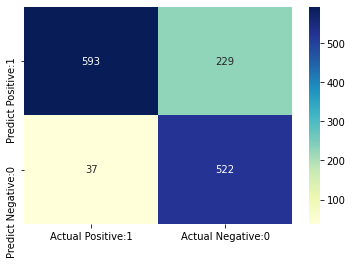

In [53]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.72      0.82       822
           1       0.70      0.93      0.80       559

    accuracy                           0.81      1381
   macro avg       0.82      0.83      0.81      1381
weighted avg       0.84      0.81      0.81      1381



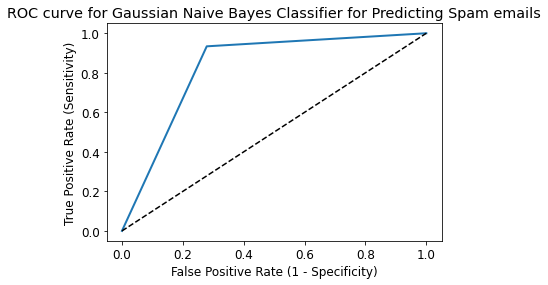

In [60]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred, )

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Spam emails')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [62]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8276


ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether an email is spam or not.

In [63]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8974


In [64]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.8447205  0.85093168 0.82608696 0.83229814 0.79192547 0.8136646
 0.81987578 0.80434783 0.81055901 0.84161491]


In [65]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8236


Interpretation¶
Using the mean cross-validation, we can conclude that we expect the model to be around 82.36% accurate on average.

If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 85.09% accuracy to 79.19% accuracy. So, we can conclude that the model is independent of the particular folds used for training.

Our original model accuracy is 0.8074, but the mean cross-validation accuracy is 0.8236. So, the 10-fold cross-validation accuracy  results in a slight performance improvement for this model.

# Challenging the Model

In [31]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
# n_estimators = No. of trees in the forest
# criterion = basis of making the decision tree split, either on gini impurity('gini'), or on infromation gain('entropy')
rfc.fit(train_x,train_y)
y_pred3 = rfc.predict(test_x)
print("Accuracy Score of Random Forest Classifier : ", accuracy_score(y_pred3,test_y))

Accuracy Score of Random Forest Classifier :  0.946133796698523
